### All of Statistics | Larry Wasserman | Solutions and Code by David A. Lee
### Chapter 7: Estimating the CDF and Statistical Functionals

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import scienceplots

3. (Computer Experiment.) Generate 100 observations from a $N(0, 1)$ distribution. Compute a 95 percent confidence band for the CDF $F$. Repeat this 1000 times and see how often the confidence band contains the true distribution function. Repeat using data from a Cauchy distribution.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


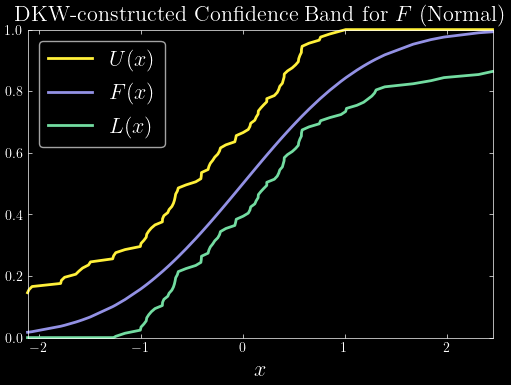

In [356]:
# Dvoretzky-Kiefer-Wolfowitz confidence interval construction for normal distribution

n = 100
alpha = 0.05
eps = np.sqrt((1/(2*n))*np.log(2/alpha))

def ecdfhat(sample):
    cdfhat = [ i/len(sample) for i in range(1, len(sample)+1)]
    return cdfhat;

def dkwintnormal():
    dkwtest, lowerbound, upperbound = np.empty(n), np.empty(n), np.empty(n)
    sample = np.sort(np.random.normal(0,1,n))
    ecdf = ecdfhat(sample)
    for i,j in zip(range(0, len(sample)), sample):
        lowerbound[i] = max(ecdf[i] - eps, 0)
        upperbound[i] = min(ecdf[i] + eps, 1)
        dkwtest[i] = (norm.cdf(j) >= lowerbound[i]) & (norm.cdf(j) <= upperbound[i])
    return dkwtest, lowerbound, upperbound, ecdf, sample;

# Plot variables

sample_plot = dkwintnormal()[4]
ecdf_plot = dkwintnormal()[3]
lower_plot = dkwintnormal()[1]
upper_plot = dkwintnormal()[2]
truecdf_plot = [norm.cdf(i) for i in sample_plot]

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(sample_plot, upper_plot, linewidth=2, color='#FFF03A', clip_on=False, label='$U(x)$')
plt.plot(sample_plot, truecdf_plot, linewidth=2, color='#9391E4', clip_on=False, label='$F(x)$')
plt.plot(sample_plot, lower_plot, linewidth=2, color='#73DCA1', clip_on=False, label='$L(x)$')
plt.title('DKW-constructed Confidence Band for $F$ (Normal)', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.xlim([sample_plot.min(), sample_plot.max()])
plt.ylim([0,1])
plt.minorticks_off()
plt.legend(loc= 'upper left', frameon=True, fontsize=16)

plt.savefig('chap7ex3i.eps', format='eps')
plt.show()

Failed to find a Ghostscript installation.  Distillation step skipped.


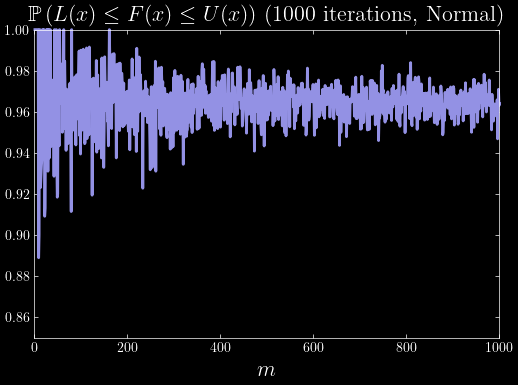

In [372]:
n = 100
alpha = 0.05
eps = np.sqrt((1/(2*n))*np.log(2/alpha))

def ecdfhat(sample):
    cdfhat = [ i/len(sample) for i in range(1, len(sample)+1)]
    return cdfhat;

def dkwintnormal():
    dkwtest, lowerbound, upperbound = np.empty(n), np.empty(n), np.empty(n)
    sample = np.sort(np.random.normal(0,1,n))
    ecdf = ecdfhat(sample)
    for i,j in zip(range(0, len(sample)), sample):
        lowerbound[i] = max(ecdf[i] - eps, 0)
        upperbound[i] = min(ecdf[i] + eps, 1)
        dkwtest[i] = (norm.cdf(j) >= lowerbound[i]) & (norm.cdf(j) <= upperbound[i])
    return dkwtest, lowerbound, upperbound, ecdf, sample;

def confbandnormal(k):
    contains = np.empty(k)
    for i in range(0,k): 
        if False in dkwintnormal()[0]:
            contains[i] = False
        else:
            contains[i] = True
    return np.count_nonzero(contains == 1) / k;

def plotconfbandnormal(m):
    plot = np.empty(m)
    for i in range(1,m+1):
        plot[i-1] = confbandnormal(i)
    return plot;

m = 1000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(list(range(1,m+1)), plotconfbandnormal(m), linewidth=2, color='#9391E4', clip_on=False, label='$\mathbb{P} \left( L(x) \le F(x) \le U(x) \\forall x \\right)$')
plt.title('$\mathbb{{P}} \left( L(x) \le F(x) \le U(x) \\right)$ ({} iterations, Normal)'.format(m), fontsize=16)
plt.xlabel('$m$', fontsize=16)
plt.xlim([0, m])
plt.ylim([0.85,1])
plt.minorticks_off()

plt.savefig('chap7ex3ii.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


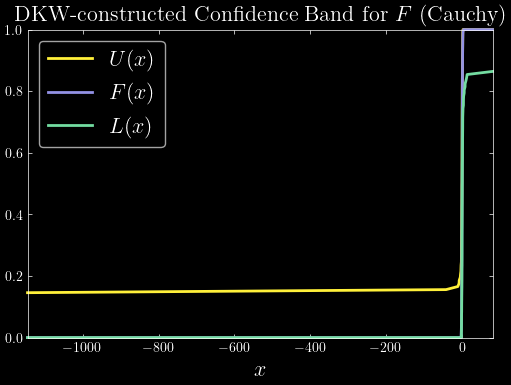

In [358]:
# Dvoretzky-Kiefer-Wolfowitz confidence interval construction for Cauchy distribution

n = 100
alpha = 0.05
eps = np.sqrt((1/(2*n))*np.log(2/alpha))

def ecdfhat(sample):
    cdfhat = [ i/len(sample) for i in range(1, len(sample)+1)]
    return cdfhat;

def dkwintcauchy():
    dkwtest, lowerbound, upperbound = np.empty(n), np.empty(n), np.empty(n)
    sample = np.sort(np.random.standard_cauchy(n))
    ecdf = ecdfhat(sample)
    for i,j in zip(range(0, len(sample)), sample):
        lowerbound[i] = max(ecdf[i] - eps, 0)
        upperbound[i] = min(ecdf[i] + eps, 1)
        dkwtest[i] = (norm.cdf(j) >= lowerbound[i]) & (norm.cdf(j) <= upperbound[i])
    return dkwtest, lowerbound, upperbound, ecdf, sample;

# Plot variables

sample_plot = dkwintcauchy()[4]
ecdf_plot = dkwintcauchy()[3]
lower_plot = dkwintcauchy()[1]
upper_plot = dkwintcauchy()[2]
truecdf_plot = [norm.cdf(i) for i in sample_plot]

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(sample_plot, upper_plot, linewidth=2, color='#FFF03A', clip_on=False, label='$U(x)$')
plt.plot(sample_plot, truecdf_plot, linewidth=2, color='#9391E4', clip_on=False, label='$F(x)$')
plt.plot(sample_plot, lower_plot, linewidth=2, color='#73DCA1', clip_on=False, label='$L(x)$')
plt.title('DKW-constructed Confidence Band for $F$ (Cauchy)', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.xlim([sample_plot.min(), sample_plot.max()])
plt.ylim([0,1])
plt.minorticks_off()
plt.legend(loc= 'upper left', frameon=True, fontsize=16)

plt.savefig('chap7ex3iii.eps', format='eps')
plt.show()

Failed to find a Ghostscript installation.  Distillation step skipped.


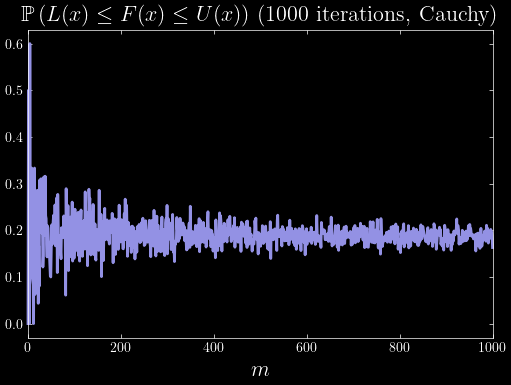

In [371]:
n = 100
alpha = 0.05
eps = np.sqrt((1/(2*n))*np.log(2/alpha))

def ecdfhat(sample):
    cdfhat = [ i/len(sample) for i in range(1, len(sample)+1)]
    return cdfhat;

def dkwintcauchy():
    dkwtest, lowerbound, upperbound = np.empty(n), np.empty(n), np.empty(n)
    sample = np.sort(np.random.standard_cauchy(n))
    ecdf = ecdfhat(sample)
    for i,j in zip(range(0, len(sample)), sample):
        lowerbound[i] = max(ecdf[i] - eps, 0)
        upperbound[i] = min(ecdf[i] + eps, 1)
        dkwtest[i] = (norm.cdf(j) >= lowerbound[i]) & (norm.cdf(j) <= upperbound[i])
    return dkwtest, lowerbound, upperbound, ecdf, sample;

def confbandcauchy(k):
    contains = np.empty(k)
    for i in range(0,k): 
        if False in dkwintcauchy()[0]:
            contains[i] = False
        else:
            contains[i] = True
    return np.count_nonzero(contains == 1) / k;

def plotconfbandcauchy(m):
    plot = np.empty(m)
    for i in range(1,m+1):
        plot[i-1] = confbandcauchy(i)
    return plot;

m = 1000

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(list(range(1,m+1)), plotconfbandcauchy(m), linewidth=2, color='#9391E4', clip_on=False, label='$\mathbb{P} \left( L(x) \le F(x) \le U(x) \\forall x \\right)$')
plt.title('$\mathbb{{P}} \left( L(x) \le F(x) \le U(x) \\right)$ ({} iterations, Cauchy)'.format(m), fontsize=16)
plt.xlabel('$m$', fontsize=16)
plt.xlim([0, m])
#plt.ylim([0.85,1])
plt.minorticks_off()

plt.savefig('chap7ex3iv.eps', format='eps')
plt.show()


7. Data on the magnitudes of earthquakes near Fiji are available on the website for this book. Estimate the CDF $F(x)$. Compute and plot a 95 percent confidence envelope for $F$. Find an approximate 95 percent confidence interval for $F(4.9) − F(4.3)$.

C:\Users\david\AppData\Local\Temp\ipykernel_22188\3961972000.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fijidata = pd.read_csv('fijiquakes.dat', delim_whitespace=True)


The 95 percent confidence interval for F(4.9) - F(4.3) is (0.49505160620646044, 0.5569483937935397)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


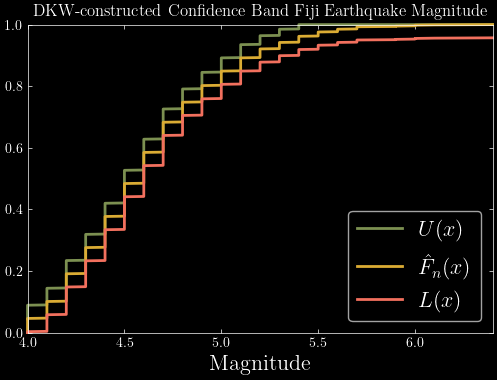

In [360]:
fijidata = pd.read_csv('fijiquakes.dat', delim_whitespace=True)
    
magdata = np.sort(fijidata['mag'])

n = len(magdata)
alpha = 0.05
eps = np.sqrt((1/(2*n))*np.log(2/alpha))

def ecdfhat(sample):
    cdfhat = [ i/len(sample) for i in range(1, len(sample)+1)]
    return cdfhat;

def dkwbounds():
    lowerbound, upperbound = np.empty(len(magdata)), np.empty(len(magdata))
    ecdf = ecdfhat(magdata)
    for i in range(0, len(magdata)):
        lowerbound[i] = max(ecdf[i] - eps, 0)
        upperbound[i] = min(ecdf[i] + eps, 1)
    return lowerbound, upperbound;

# Plot variables

fhat = ecdfhat(magdata)
lower_plot = dkwbounds()[0]
upper_plot = dkwbounds()[1]

# Use results of exercise 7.4.6 for confidence interval

theta = ecdf(4.9) - ecdf(4.3)
sehat = np.sqrt((1/len(magdata))*theta*(1-theta))
print('The 95 percent confidence interval for F(4.9) - F(4.3) is',(theta - 1.96*sehat, theta + 1.96*sehat))

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(magdata, upper_plot, linestyle='solid', linewidth=2, color='#7C9051', clip_on=False, label='$U(x)$')
plt.plot(magdata, fhat, linestyle='solid', linewidth=2, color='#DBAC34', clip_on=False, label='$\hat{F}_n(x)$')
plt.plot(magdata, lower_plot, linestyle='solid', linewidth=2, color='#F2705E', clip_on=False, label='$L(x)$')
plt.title('DKW-constructed Confidence Band Fiji Earthquake Magnitude', fontsize=12)
plt.xlabel('Magnitude', fontsize=16)
plt.xlim([magdata.min(), magdata.max()])
plt.ylim([0,1])
plt.minorticks_off()
plt.legend(loc= 'lower right', frameon=True, fontsize=16)

plt.savefig('chap7ex7.eps', format='eps')
plt.show()

8. Get the data on eruption times and waiting times between eruptions of the Old Faithful geyser from the website. Estimate the mean waiting time and give a standard error for the estimate. Also, give a 90 percent confidence interval for the mean waiting time. Now estimate the median waiting time. In the next chapter we will see how to get the standard error for the median.

In [6]:
faithful = pd.read_csv('faithful.dat', delim_whitespace=True)
    
waitingdata = faithful['waiting']

waitingmean = np.mean(waitingdata)
waitingse = np.std(waitingdata, ddof=1) / np.sqrt(np.size(waitingdata))

waitingci = (round(waitingmean - 1.65*waitingse, 3), round(waitingmean + 1.65*waitingse, 3))

waitingmedian = np.median(waitingdata)

print(round(waitingmean, 3), round(waitingse, 3), waitingci, round(waitingmedian, 3))


70.897 0.824 (69.537, 72.257) 76.0


C:\Users\david\AppData\Local\Temp\ipykernel_10080\166958976.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  faithful = pd.read_csv('faithful.dat', delim_whitespace=True)


10. In 1975, an experiment was conducted to see if cloud seeding produced rainfall. 26 clouds were seeded with silver nitrate and 26 were not. The decision to seed or not was made at random. Let $\theta$ be the difference in the mean precipitation from the two groups. Estimate $\theta$. Estimate the standard error of the estimate and produce a 95 percent confidence interval.

In [7]:
clouds = pd.read_csv('clouds.dat', delim_whitespace=True)

unseeded = clouds['Unseeded_Clouds']
seeded = clouds['Seeded_Clouds']

diffmean = np.abs(np.mean(unseeded) - np.mean(seeded))
unseeded_se = np.std(unseeded) / np.sqrt(np.size(unseeded))
seeded_se = np.std(seeded) / np.sqrt(np.size(seeded))
diffse = np.sqrt(np.square(unseeded_se) + np.square(seeded_se))

diffci = (round(diffmean - 1.96*diffse, 3), round(diffmean + 1.96*diffse, 3))

print(round(diffmean, 3), round(diffse, 3), diffci)



277.396 136.124 (10.593, 544.199)


C:\Users\david\AppData\Local\Temp\ipykernel_10080\343593444.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  clouds = pd.read_csv('clouds.dat', delim_whitespace=True)
